In [1]:
# Загружаем библиотеки
import pandas as pd # Датафреймы pandas
import numpy as np # Математика
import matplotlib.pyplot as plt # Графики

#### Исходные данные

In [2]:
# Линейная функция со случайным шумом
N = 100
theta0_true = 10
theta1_true = 2
X = np.random.uniform(low = 0, high = 100, size = N)
Y = theta1_true * X + theta0_true + np.random.normal(scale = 5, size = N)

In [3]:
# Функция потерь
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) ** 2
    return total_cost / (2 * len(X))

In [4]:
# Производная по theta0
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])
    return total_cost / (len(X))    

In [5]:
# Производная по theta1
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i]
    return total_cost / (len(X))  

#### Метод градиентного спуска

In [57]:
# Количество итераций
epochs = 30000
# Величина шага
learning_rate = 0.0005

# Начальные значения theta0 и theta1
theta0 = 1
theta1 = 1
grad_cost = [] # Значения функции потерь
grad_theta0 = [] # Значения theta0
grad_theta1 = [] # Значения theta1

# Оптимизация методом градиентного спуска
for i in range(epochs):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    theta0 -= learning_rate * dt0
    theta1 -= learning_rate * dt1
    
    grad_cost.append(cost_function(X, Y, theta0, theta1))
    grad_theta0.append(theta0)
    grad_theta1.append(theta1)
    
#     print(f'i = {i} theta0: {theta0}, theta1: {theta1}, cost: {cost_function(X, Y, theta0, theta1)}')

print(f'Результат:\ntheta0 = {theta0}, theta1 = {theta1}, cost: {cost_function(X, Y, theta0, theta1)}')
print('Метод самый медленный')

Результат:
theta0 = 9.692501276124853, theta1 = 1.995429773011715, cost: 12.918715388530979
Метод самый медленный


#### Метод nesterov momentum

In [42]:
# Количество итераций
epochs = 4000
# Величина шага
learning_rate = 0.001

# Начальные значения theta0 и theta1
theta0 = 1
theta1 = 1
momentum_cost = []
momentum_theta0 = []
momentum_theta1 = []

# Начальные значения коэффициентов nesterov momentuт
gamma = 0.9
vt0 = 0
vt1 = 0

# Оптимизация методом nesterov momentuт
for i in range(epochs):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    vt0 = gamma * vt0 + learning_rate * dt0
    vt1 = gamma * vt1 + learning_rate * dt1
    
    theta0 -= vt0
    theta1 -= vt1
    
    momentum_cost.append(cost_function(X, Y, theta0, theta1))
    momentum_theta0.append(theta0)
    momentum_theta1.append(theta1)
    
#     print(f'i = {i} theta0: {theta0}, theta1: {theta1}, cost: {cost_function(X, Y, theta0, theta1)}')

print(f'Результат:\ntheta0 = {theta0}, theta1 = {theta1}, cost: {cost_function(X, Y, theta0, theta1)}')
print('Метод быстрее по сравнению с градиентным спуском')

Результат:
theta0 = 9.88865123182381, theta1 = 1.9924872560905595, cost: 12.913814251466803
Метод быстрее по сравнению с градиентным спуском


#### Метод rmsprop

In [20]:
# Количество итераций
epochs = 1000
# Величина шага
learning_rate = 0.1

# Начальные значения theta0 и theta1
theta0 = 1
theta1 = 1
rmsprop_cost = []
rmsprop_theta0 = []
rmsprop_theta1 = []

# Начальные значения коэффициентов rmsprop
gamma = 0.9
eps = 0.001
EG0 = 0
EG1 = 0

# Оптимизация методом rmsprop
for i in range(epochs):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    EG0 = gamma * EG0 + (1 - gamma) * dt0 ** 2
    EG1 = gamma * EG1 + (1 - gamma) * dt1 ** 2
    
    theta0 -= dt0 * learning_rate / (EG0 + eps) ** 0.5
    theta1 -= dt1 * learning_rate / (EG1 + eps) ** 0.5
    
    rmsprop_cost.append(cost_function(X, Y, theta0, theta1))
    rmsprop_theta0.append(theta0)
    rmsprop_theta1.append(theta1)    
    
#     print(f'i = {i} theta0: {theta0}, theta1: {theta1}, cost: {cost_function(X, Y, theta0, theta1)}')

print(f'Результат:\ntheta0 = {theta0}, theta1 = {theta1}, cost: {cost_function(X, Y, theta0, theta1)}')
print('Метод самый быстрый из рассмотренных')

Результат:
theta0 = 9.838097605564782, theta1 = 1.942495682065569, cost: 17.183325738133497
Метод самый быстрый из рассмотренных


#### Сравнение скорости сходимости методов

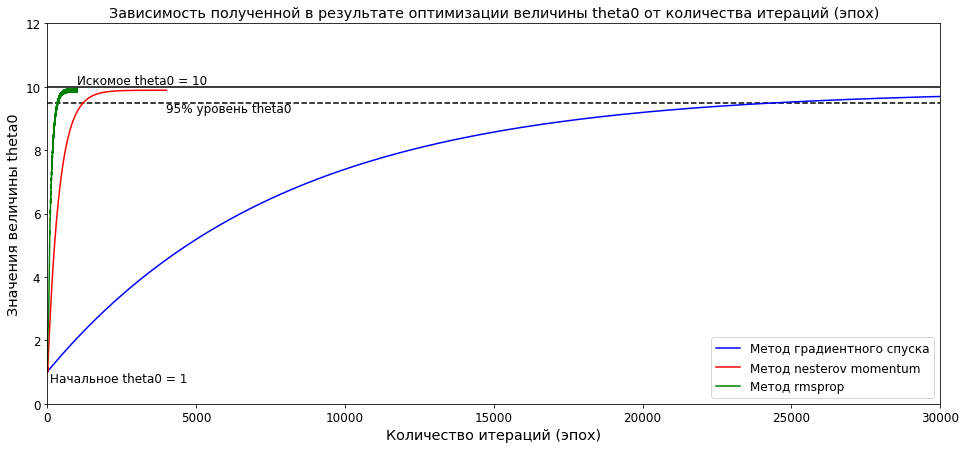

Для нахождения значения theta0 наименьшее количество итераций требуется методу rmsprop, наибольшее - методу градиентного спуска


In [50]:
# Скорость работы методов оцениваем по моменту достижения искомых значений theta0 и theta1 с погрешностью 5 %

# Размер поля графика
plt.figure(figsize = (16, 7))

# Значение theta0
plt.axhline(y = theta0_true, xmin = 0, xmax = 30000, color = 'black')
plt.axhline(y = 0.95 * theta0_true, xmin = 0, xmax = 30000, color = 'black', linestyle = '--')
plt.text(1000, theta0_true, f'Искомое theta0 = {theta0_true}', fontsize = 'large', verticalalignment = 'bottom')
plt.text(4000, 0.95 * theta0_true, '95% уровень theta0', fontsize = 'large', verticalalignment = 'top')
plt.text(100, 1, f'Начальное theta0 = 1', fontsize = 'large', verticalalignment = 'top')

# Графики значений theta0 для всех методов
plt.plot(grad_theta0, color = 'blue', label = 'Метод градиентного спуска')
plt.plot(momentum_theta0, color = 'red', label = 'Метод nesterov momentum')
plt.plot(rmsprop_theta0, color = 'green', label = 'Метод rmsprop')

# Оформление графика
plt.ylim(0, 12)
plt.xlim(0, 30000)
plt.tick_params(labelsize = 'large')
plt.xlabel('Количество итераций (эпох)', fontsize = 'x-large')
plt.ylabel('Значения величины theta0', fontsize = 'x-large')
plt.title('Зависимость полученной в результате оптимизации величины theta0 от количества итераций (эпох)', fontsize = 'x-large')

plt.legend(fontsize = 'large')
plt.show()

print('Для нахождения значения theta0 наименьшее количество итераций требуется методу rmsprop, наибольшее - методу градиентного спуска')

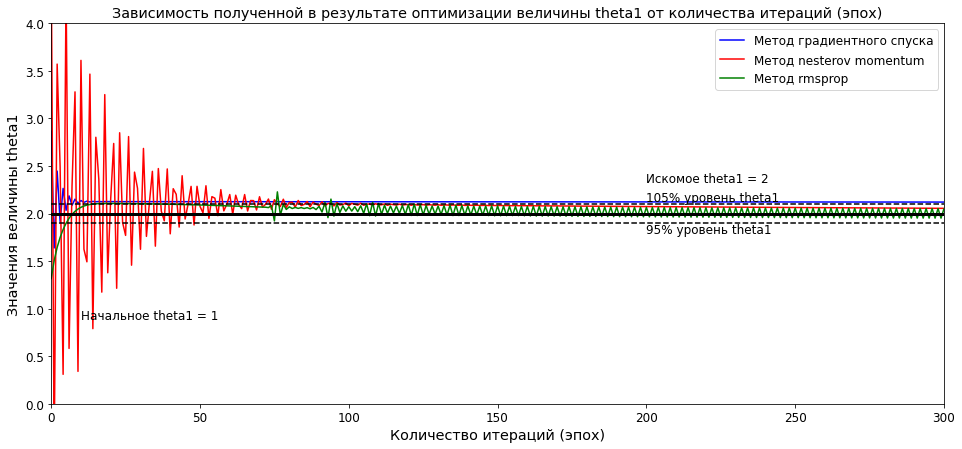

Все методы находят значение величины theta1 за достаточно малое количество итераций относительно нахождения величины theta0.
Поэтому скорость работы методов определяется скоростью нахождения величины величины theta0


In [68]:
# Размер поля графика
plt.figure(figsize = (16, 7))

# Значение theta1
plt.axhline(y = theta1_true, xmin = 0, xmax = 30000, color = 'black', linewidth = 3, zorder = 5)
plt.axhline(y = 0.95 * theta1_true, xmin = 0, xmax = 30000, color = 'black', linestyle = '--', zorder = 5)
plt.axhline(y = 1.05 * theta1_true, xmin = 0, xmax = 30000, color = 'black', linestyle = '--', zorder = 5)
plt.text(200, theta1_true + 0.3, f'Искомое theta1 = {theta1_true}', fontsize = 'large', verticalalignment = 'bottom')
plt.text(200, 0.95 * theta1_true, '95% уровень theta1', fontsize = 'large', verticalalignment = 'top')
plt.text(200, 1.05 * theta1_true, '105% уровень theta1', fontsize = 'large', verticalalignment = 'bottom')
plt.text(10, 1, f'Начальное theta1 = 1', fontsize = 'large', verticalalignment = 'top')

# Графики значений theta1 для всех методов
plt.plot(grad_theta1, color = 'blue', label = 'Метод градиентного спуска')
plt.plot(momentum_theta1, color = 'red', label = 'Метод nesterov momentum')
plt.plot(rmsprop_theta1, color = 'green', label = 'Метод rmsprop')

# Оформление графика
plt.ylim(0, 4)
plt.xlim(0, 300)
plt.tick_params(labelsize = 'large')
plt.xlabel('Количество итераций (эпох)', fontsize = 'x-large')
plt.ylabel('Значения величины theta1', fontsize = 'x-large')
plt.title('Зависимость полученной в результате оптимизации величины theta1 от количества итераций (эпох)', fontsize = 'x-large')

plt.legend(fontsize = 'large')
plt.show()

print('Все методы находят значение величины theta1 за достаточно малое количество итераций относительно нахождения величины theta0.\nПоэтому скорость работы методов определяется скоростью нахождения величины величины theta0')

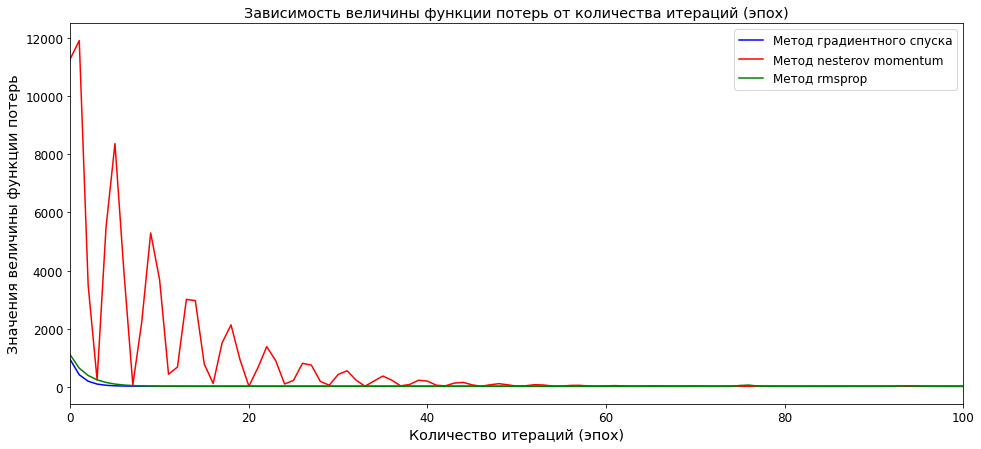

Все методы обеспечивают достаточно быструю минимизацию величины функции потерь относительно скорости нахождения значений величин theta0 и theta1


In [78]:
# Значение cost_function
plt.figure(figsize = (16, 7))

# Графики значений cost_function для всех методов
plt.plot(grad_cost, color = 'blue', label = 'Метод градиентного спуска')
plt.plot(momentum_cost, color = 'red', label = 'Метод nesterov momentum')
plt.plot(rmsprop_cost, color = 'green', label = 'Метод rmsprop')

# Оформление графика
plt.xlim(0, 100)
plt.tick_params(labelsize = 'large')
plt.xlabel('Количество итераций (эпох)', fontsize = 'x-large')
plt.ylabel('Значения величины функции потерь', fontsize = 'x-large')
plt.title('Зависимость величины функции потерь от количества итераций (эпох)', fontsize = 'x-large')

plt.legend(fontsize = 'large')
plt.show()

print('Все методы обеспечивают достаточно быструю минимизацию величины функции потерь относительно скорости нахождения значений величин theta0 и theta1')